# Stroke Prediction EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency as chi2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

**First Look into Data**

In [2]:
# upload data and look at first parts
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# info on data
df.info()
# missing some values in the BMI data, fix by filling with median

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# look at the summary statistics of data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


I am missing some values in the BMI column, and Stroke is the target variable we are interested in so I will start by filling NA values in the BMI columns and create plots to understand relationships with stroke

In [5]:
# filling NA in BMI
# df['bmi'] = df['bmi'].replace(np.nan ,np.median(df['bmi'])) 
median_value = 28.1 # can see from info table that the median for bmi is 28.1
df['bmi'].fillna(value=median_value, inplace=True)

In [6]:
# check that it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Great, now I have a full data set and can get a look at the shapes of the variables

## Gender

In [7]:
df['gender'] = df['gender'].replace('Other', 'Female')

,id
gender,
Female,2995
Male,2115


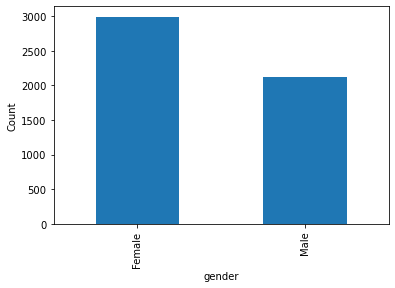

In [8]:
# start with Gender and go down
df.groupby(['gender'])['id'].count().plot(kind = 'bar').set_ylabel('Count')
df.groupby(['gender'])[['id']].count()
# total count of differences in gender count


Replaced the one occurance of 'Other' with Female

Now that I have the total count of genders, I'd like to see the relationship that gender has with stroke occurance

,stroke
gender,
Female,0.047078
Male,0.051064


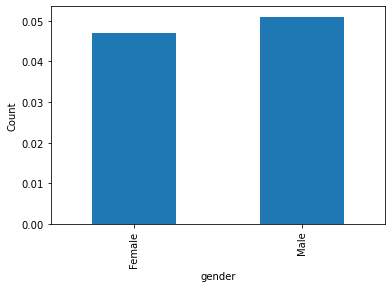

In [9]:
# stroke occurance with gender
df.groupby(['gender'])['stroke'].mean().plot(kind = 'bar').set_ylabel('Count')
df.groupby(['gender'])[['stroke']].mean()

Finally do a $chi^2$ test to see if there is a relationship between the variables

$H_o$ = *Stroke and Gender data are independant*

$H_a$ = *Stroke and Gender data are not independant*

In [10]:
contingency_g = pd.crosstab(df['gender'], df['stroke'])
contingency_g

stroke,0,1
gender,,
Female,2854,141
Male,2007,108


In [11]:
c, p, dof, expected = chi2(contingency_g)
p

0.5580285118426893

From a p-value of 0.558 we **cannot** reject the null hypothesis, therefore we can conclude that the stroke and gender data are independant

,stroke
stroke,
0,4861
1,249


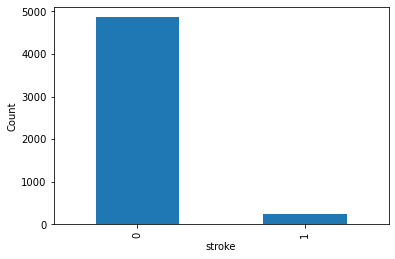

In [12]:
df.groupby(['stroke'])['stroke'].count().plot(kind = 'bar').set_ylabel('Count')
df.groupby(['stroke'])[['stroke']].count()

Here we can see that there is a discrepency in the count of stroke vs no stroke. This may affect the predictive power of the model as the majority is 0, this is something that will be addressed when creating models

## Age

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

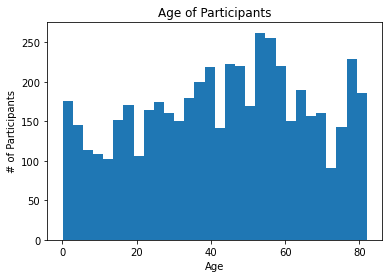

In [13]:
# plot a histogram of data to look at spread
plt.hist(df.age, bins = 30)
plt.ylabel('# of Participants')
plt.xlabel('Age')
plt.title('Age of Participants')
df.age.describe()

,mean,std
stroke,,
0,41.971545,22.291940
1,67.728193,12.727419


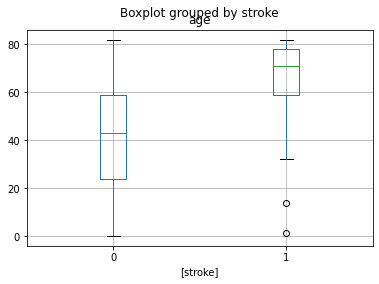

In [14]:
# box plot for age
df.boxplot(column = ['age'], by = ['stroke'])
pd.DataFrame(df.groupby(['stroke'])['age'].describe().loc[:,['mean','std']])

This boxplot indicates age may be a significant factor in stroke occurance. To verify this observations, a *t test* is most appropriate to see if there is a relationship between the variables

$H_o$ = *Stroke and Age data are independant*

$H_a$ = *Stroke and Age data are not independant*

In [27]:
# t test for age
rvs1 = df.loc[(df.stroke==0)]['age']
rvs2 = df.loc[(df.stroke ==1)]['age']
p,v = stats.ttest_ind(rvs1,rvs2)
print(p,v)

-18.08083426887953 7.0307775129939774e-71


From the *t test* performed above with a *p value* of **7.03e-17**,  with prior indications from the box plot created with the occurances of strokes, we know that we can reject the null hypothesis, and conclude that age and stroke occurance are not independant of eachother.

## Hypertension

,id
hypertension,
0,4612
1,498


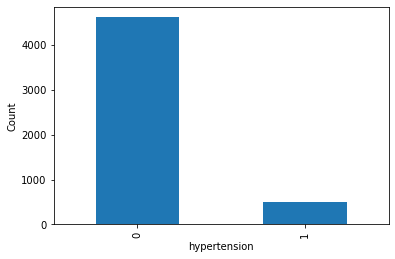

In [15]:
# count of patients with hypertension
df.groupby(['hypertension'])['id'].count().plot(kind = 'bar').set_ylabel('Count')
df.groupby(['hypertension'])[['id']].count()

,stroke
hypertension,
0,0.039679
1,0.132530


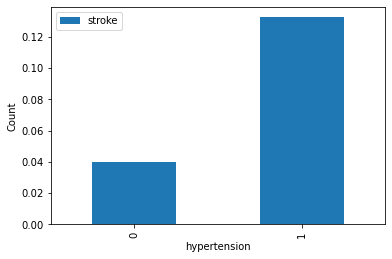

In [16]:
# hypertension and stroke
df.groupby([ 'hypertension'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['hypertension' ])[['stroke']].mean()

We see that there is a small portion of the sample that experience hypertension. A $chi^2$ test will allow us again to test if the data is independant of stroke occurances.

$H_0$ : *The stroke and hypertension data are independant*

$H_a$ : *The stroke and hypertension data are not independant*

In [44]:
contingency_h = pd.crosstab(df['hypertension'], df['stroke'])
contingency_h

stroke,0,1
hypertension,,
0,4429,183
1,432,66


In [45]:
c, p, dof, expected = chi2(contingency_h)
p

1.661621901511823e-19

With a *p value* of 1.66e-19 we can safely reject the null hypothesis, and conclude that the stroke and hypertension data are not independant of eachother

## Heart Disease

,id
heart_disease,
0,4834
1,276


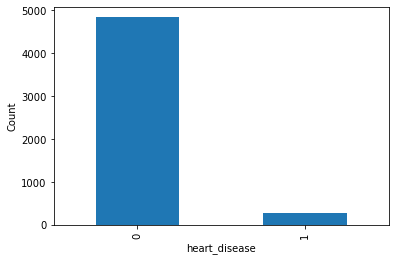

In [17]:
# total count of patients with heart disease
df.groupby(['heart_disease'])['id'].count().plot(kind = 'bar').set_ylabel('Count')
df.groupby(['heart_disease'])[['id']].count()

,stroke
heart_disease,
0,0.041787
1,0.170290


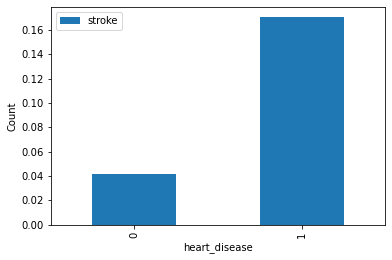

In [18]:
# heart disease and stroke
df.groupby([ 'heart_disease'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['heart_disease' ])[['stroke']].mean()

We see that there is a small portion of the sample that experience heart disease but a large portion of those expericing heart disease experience a stroke. A $chi^2$ test will allow us again to test if the data is independant of stroke occurances.

$H_0$ : *The stroke and heart disease data are independant*

$H_a$ : *The stroke and heart disease data are not independant*

In [49]:
# chi square for heart disease
contingency_hd = pd.crosstab(df['heart_disease'], df['stroke'])
contingency_hd

stroke,0,1
heart_disease,,
0,4632,202
1,229,47


In [51]:
# chi square p value
c, p, dof, expected = chi2(contingency_hd)
p

2.0887845685229236e-21

From this *p value* we can safely reject the null hypothesis, and conclude that the stroke and heart disease data are not independant of each other

## Ever Married

,id
ever_married,
No,1757
Yes,3353


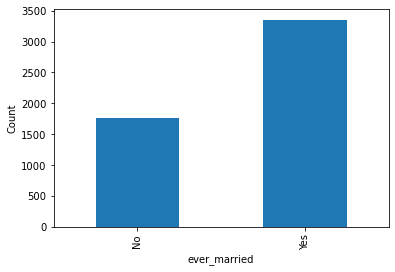

In [19]:
# count of marital status of participants
df.groupby([ 'ever_married'])['id'].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['ever_married' ])[['id']].count()

,stroke
ever_married,
No,0.016505
Yes,0.065613


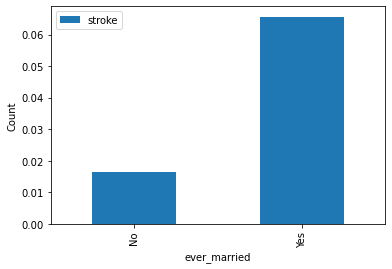

In [20]:
# marital status and stroke
df.groupby([ 'ever_married'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['ever_married' ])[['stroke']].mean()

We see that there is a small portion of the sample that experience heart disease but a large portion of those married experience a stroke. A $chi^2$ test will allow us again to test if the data is independant of stroke occurances.

$H_0$: The stroke and marital status data are independant

$H_a$: The stroke and marital status data are not independant

In [54]:
contingency_m = pd.crosstab(df['ever_married'], df['stroke'])
contingency_m

stroke,0,1
ever_married,,
No,1728,29
Yes,3133,220


In [55]:
# chi square p value
c, p, dof, expected = chi2(contingency_m)
p

1.6389021142314745e-14

From this *p value* we can safely reject the null hypothesis, and conclude that the stroke and marital status data are not independant from eachother

## Work Type

,id
work_type,
Govt_job,657
Never_worked,22
Private,2925
Self-employed,819
children,687


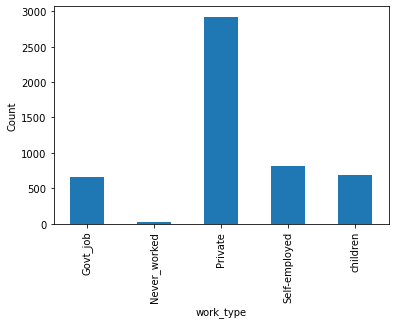

In [21]:
# count of work types
df.groupby([ 'work_type'])['id'].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['work_type' ])[['id']].count()

,stroke
work_type,
Govt_job,0.050228
Never_worked,0.000000
Private,0.050940
Self-employed,0.079365
children,0.002911


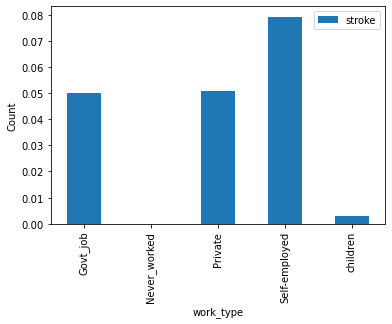

In [22]:
# work type and stroke
df.groupby([ 'work_type'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['work_type' ])[['stroke']].mean()

We see that there is a difference in job count and those that experience a stroke. A $chi^2$ test will allow us again to test if the data is independant of stroke occurances.

$H_0$: The stroke and work type data are independant

$H_a$: The stroke and work type data are not independant

In [58]:
# work type chi square test
contigency_w = pd.crosstab(df['work_type'], df['stroke'])
contigency_w

stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2776,149
Self-employed,754,65
children,685,2


In [59]:
# chi square p value
c, p, dof, expected = chi2(contigency_w)
p

5.397707801896119e-10

From this p value we can safely reject the null hypothesis, and conclude that the stroke and work type data are not independant of eachother

## Residence Type

,stroke
Residence_type,
Rural,2514
Urban,2596


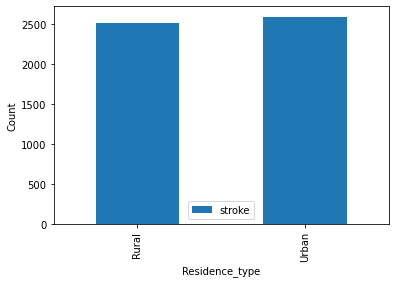

In [23]:
# residence type count
df.groupby([ 'Residence_type'])[['stroke']].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['Residence_type' ])[['stroke']].count()

,stroke
Residence_type,
Rural,0.045346
Urban,0.052003


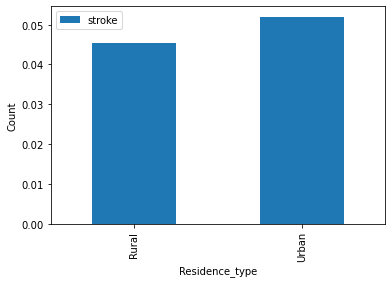

In [24]:
# residence type and stroke
df.groupby([ 'Residence_type'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['Residence_type' ])[['stroke']].mean()

We see that there is a difference in residential type and those that experience a stroke. A $chi^2$ test will allow us again to test if the data is independant of stroke occurances.

$H_0$: *The stroke and residential type data are independant*

$H_a$: *The stroke and residential type data are not independant*

In [25]:
contigency_rt = pd.crosstab(df['Residence_type'], df['stroke'])
contigency_rt

stroke,0,1
Residence_type,,
Rural,2400,114
Urban,2461,135


In [26]:
# chi square p value
c, p, dof, expected = chi2(contigency_rt)
p

0.29833169286876987

With this *p value* there is not enough evidence to reject the null hypothesis, therefore we can conclude that Residence Type is independant of stroke occurance data.

## Average Glucose Level

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

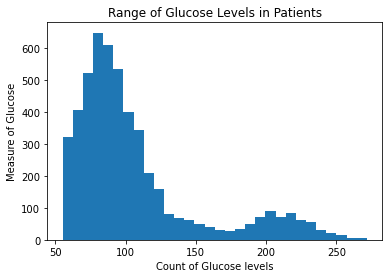

In [27]:
plt.hist(df.avg_glucose_level, bins = 30)
plt.ylabel('Measure of Glucose')
plt.xlabel('Count of Glucose levels')
plt.title('Range of Glucose Levels in Patients')
df.avg_glucose_level.describe()

,mean,std
stroke,,
0,104.795513,43.846069
1,132.544739,61.921056


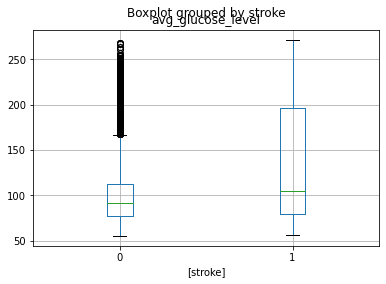

In [65]:
df.boxplot(column=['avg_glucose_level'],by = ['stroke'])
pd.DataFrame(df.groupby( ['stroke'])['avg_glucose_level'].describe().loc[:,['mean','std']])

We see that there is a relationship between avg_glucose level in those that experience a stroke and ones that dont. A t test will allow us again to test if the data is independant of stroke occurances.

$H_0$: *The stroke and avg glucose level data are independant*

$H_a$: *The stroke and avg glucose level data are not independant*

In [66]:
rvs1 = df.loc[(df.stroke == 0)]['avg_glucose_level']
rvs2 = df.loc[(df.stroke == 1)]['avg_glucose_level']
p,v = stats.ttest_ind(rvs1,rvs2)
print(p,v)

-9.513352175431471 2.7678105194741054e-21


With this *p value* there is enough evidence to safely reject the null hypothesis, and conclude that the data is not independant of eachother

## BMI

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

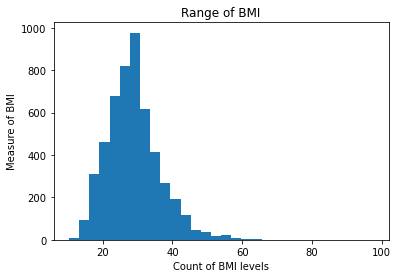

In [28]:
# hist of BMI
plt.hist(df.bmi, bins = 30)
plt.ylabel('Measure of BMI')
plt.xlabel('Count of BMI levels')
plt.title('Range of BMI')
df.avg_glucose_level.describe()

,mean,std
stroke,,
0,28.799115,7.777269
1,30.090361,5.861877


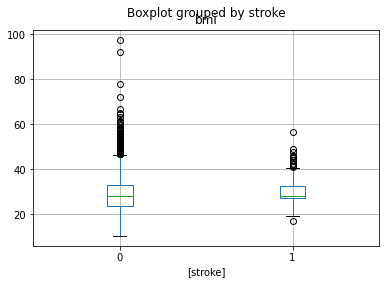

In [29]:
df.boxplot(column=['bmi'],by = ['stroke'])
pd.DataFrame(df.groupby( ['stroke'])['bmi'].describe().loc[:,['mean','std']])

We see that may be a relationship between bmi in those that experience a stroke and ones that dont. A t test will allow us again to test if the data is independant of stroke occurances.

$H_0$: *The stroke and bmi data are independant*

$H_a$: *The stroke and bmi data are not independant*

In [71]:
rvs1 = df.loc[(df.stroke == 0)]['bmi']
rvs2 = df.loc[(df.stroke == 1)]['bmi']
p,v = stats.ttest_ind(rvs1,rvs2)
print(p,v)

-2.5824731791682565 0.009837070906633378


With this *p value* of 0.009 there is enough evidence to safely reject the null hypothesis, and conclude that the BMI data and stroke occurance are not independant

## Smoking Status

,stroke
smoking_status,
Unknown,1544
formerly smoked,885
never smoked,1892
smokes,789


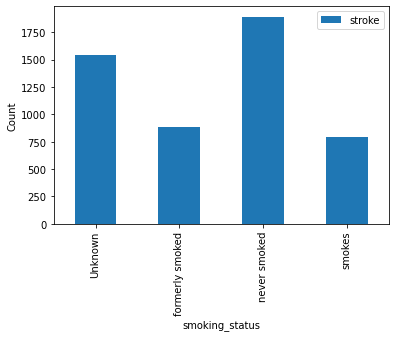

In [30]:
# smoking status count
df.groupby([ 'smoking_status'])[['stroke']].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['smoking_status' ])[['stroke']].count()

,stroke
smoking_status,
Unknown,0.030440
formerly smoked,0.079096
never smoked,0.047569
smokes,0.053232


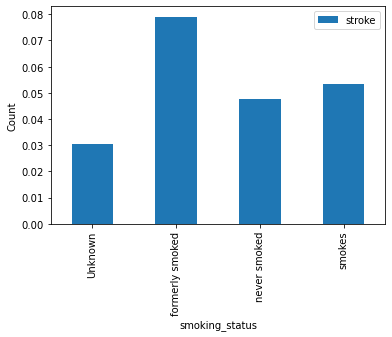

In [31]:
# smoking and stroke
df.groupby([ 'smoking_status'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['smoking_status' ])[['stroke']].mean()

We see that there may be a relationship between smoking status and those that experience a stroke. A $chi^2$ test will allow us again to test if the data is independant of stroke occurances.

$H_0$: *The stroke and smoking status data are independant*

$H_a$: *The stroke and smoking status data are not independant*

In [77]:
# smoking status chi2 test
contingency_ss = pd.crosstab(df['smoking_status'], df['stroke'])
contingency_ss

stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


In [78]:
c, p, dof, expected = chi2(contingency_ss)
p

2.0853997025008455e-06

With this *p value* there is enough evidence to safely reject the null hypothesis, and conclude that smoking status does have effect on stroke occurance.

## Initial Conclusions

We can see from the above *chi^2* tests and *t tests* that the majority of the demographic information collected has a statisitcally significant relationship with our variable of interest, stroke occurance. Modeling the data will help identify which features are most important. The next steps are to create dummy variables and being modeling data.